In [1]:
import cv2
import numpy as np
import glob
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print ("OpenCV:",  cv2.__version__)
print ("Numpy : ", np.__version__)
print ("Python:",  sys.version)

OpenCV: 4.6.0
Numpy :  1.23.1
Python: 3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]


In [3]:
# load training data
dim = 240*320  # 76800
# dim = 240 * 320
X = np.empty((0, dim))
y = np.empty((0, 4))  # representing the 4 outputs
training_data = glob.glob('trained_last_night.npz')  # trained data

for single_npz in training_data:
    with np.load(single_npz) as data:
        train = data['train']
        train_labels = data['train_labels']
    X = np.vstack((X, train))
    y = np.vstack((y, train_labels))

print(X)
print()
print(y)
print('Image array shape: ', X.shape)
print('Label array shape: ', y.shape)


[[  1.   1.   0. ... 147. 148. 146.]
 [  1.   1.   0. ... 147. 148. 146.]
 [ 99. 102. 103. ... 156. 156. 155.]
 ...
 [  0.   0.   0. ... 144. 143. 145.]
 [  0.   0.   0. ... 144. 143. 145.]
 [101. 101. 100. ... 146. 144. 138.]]

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Image array shape:  (39, 76800)
Label array shape:  (16, 4)


In [4]:
# load training data
dim = 240*320  # 76800
# dim = 240 * 320
X = np.empty((0, dim))
y = np.empty((0, 4)) # representing the 4 outputs
training_data = glob.glob('trained_last_night.npz') # trained data

for single_npz in training_data:
    with np.load(single_npz) as data:
        train = data['train']
        train_labels = data['train_labels']
    X = np.vstack((X, train[0:16]))
    y = np.vstack((y, train_labels))

print(X)
print()
print(y)
print ('Image array shape: ', X.shape)
print ('Label array shape: ', y.shape)

[[  1.   1.   0. ... 147. 148. 146.]
 [  1.   1.   0. ... 147. 148. 146.]
 [ 99. 102. 103. ... 156. 156. 155.]
 ...
 [  4.   5.   5. ... 141. 141. 141.]
 [  4.   5.   5. ... 141. 141. 141.]
 [ 63.  65.  60. ... 159. 157. 157.]]

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Image array shape:  (16, 76800)
Label array shape:  (16, 4)


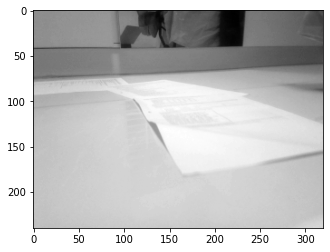

In [5]:
plt.imshow(X[2].reshape(240, 320), cmap='gray') # 240 is the height, 320 is the width

In [6]:
# create a neural network
model = cv2.ml.ANN_MLP_create()
layer_sizes = np.int32([dim, 32, 4]) # hidden layer = 32 neurons

# setLayerSizes()
# Integer vector specifying the number of neurons in each layer including the input and output layers. 
# The very first element specifies the number of elements in the input layer. 
# The last element - number of elements in the output layer. Default value is empty Mat.
model.setLayerSizes(layer_sizes)
model.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP) # Back propagation / Faster Rprop
model.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 2, 1) # alpha = 2, beta = 1 image below
model.setTermCriteria((cv2.TERM_CRITERIA_COUNT, 20, 0.01))

In [7]:
# training
model.train(np.float32(X), cv2.ml.ROW_SAMPLE, np.float32(y))

# The number of samples for both X and y should be same

True

In [8]:
# evaluate on training data
ret, resp = model.predict(X)
# Returns the indices of the maximum values along an axis.
prediction = resp.argmax(-1)
true_labels = y.argmax(-1)

train_rate = np.mean(prediction == true_labels)
print (len(prediction))
print (prediction)
print ('Train accuracy: ', "{0:.2f}%".format(train_rate * 100))

16
[1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 2]
Train accuracy:  37.50%


In [9]:
# save model
model.save('model_test.xml')

In [10]:
# load model
model = cv2.ml.ANN_MLP_load('model_test.xml')

In [11]:
# predict
ret, resp = model.predict(X)
print(resp)
print(len(resp))
print('---')
resp.argmax(-1)

[[-0.55844168  1.02631579 -0.02631579 -0.99998969]
 [-0.55844168  1.02631579 -0.02631579 -0.99998969]
 [-0.55844168  1.02631579 -0.02631579 -0.99998969]
 [ 0.73435124 -0.02631579  1.02631579  0.99999823]
 [ 0.73435124 -0.02631579  1.02631579  0.99999823]
 [-0.55844168  1.02631579 -0.02631579 -0.99998969]
 [-0.55844168  1.02631579 -0.02631579 -0.99998969]
 [-0.55844168  1.02631579 -0.02631579 -0.99998969]
 [ 0.73435124 -0.02631579  1.02631579  0.99999823]
 [ 0.73435124 -0.02631579  1.02631579  0.99999823]
 [-0.55844168  1.02631579 -0.02631579 -0.99998969]
 [-0.55844168  1.02631579 -0.02631579 -0.99998969]
 [-0.55844168  1.02631579 -0.02631579 -0.99998969]
 [-0.55844168  1.02631579 -0.02631579 -0.99998969]
 [-0.55844168  1.02631579 -0.02631579 -0.99998969]
 [ 0.73435124 -0.02631579  1.02631579  0.99999823]]
16
---


array([1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2], dtype=int64)